<a href="https://colab.research.google.com/github/mkjubran/ENEE339/blob/master/PAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This experiment covers the following topics:
1. The periodic pulse train (square wave) in the time and frequency domains.
2. The three sampling methods: natural sampling, flat-topped sampling, and ideal sampling in the time and frequency domains
3. The sampling theorem: signal sampling and reconstruction.
4. Time division multiplexing TDM.

# The Periodic Pulse Train in the Time and Frequency Domains

A periodic square function is characterized by its amplitude, frequency $f$, and duty cycle. Here, we will generate a square wave function to see how changing the duty cycle affects the signal in the time and frequency domains.

Import necessary libraries

In [0]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

Set the time variables

In [0]:
Tstart=0
Tstop=10
Tstep=1e-5
t = np.arange(Tstart,Tstop,Tstep)

Plot the periodic pulse train (square wave) in the time domain

(0.0, 1.0)

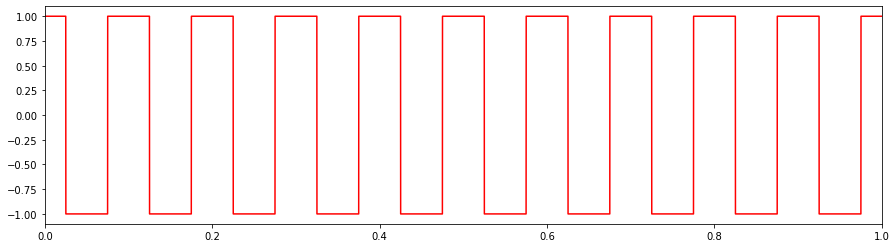

In [0]:
dty=0.5     # duty cycle of the square wave
f=10        # frequency of the square wave

pt=signal.square(2 * np.pi * f * t +np.pi*dty, duty=dty) # pulse train with duty cycle=dty
                                                         # note that the signal is shifted to the left to start at the center of the ON period 
plt.figure(figsize=(15,4))
plt.plot(t,pt,'r')
plt.xlim(0,1)

Plot the periodic pulse train (square wave) in the frequency domain

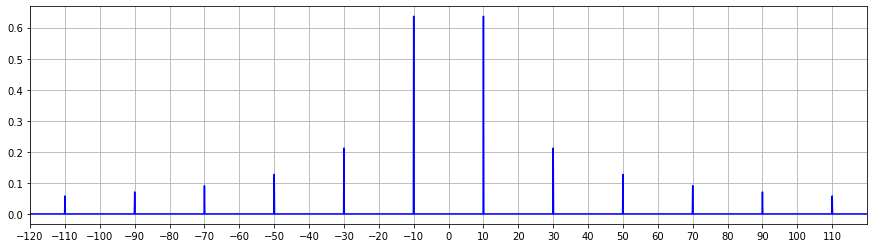

In [0]:
N=len(t)
PT = np.abs(np.fft.fft(pt))   # pulse train (square wave) in the frequency domain
freqs = np.fft.fftfreq(pt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
PT=PT[idx]/N

lim=120   # x-axis limits
plt.figure(figsize=(15,4))
plt.plot(freqs, PT,'b')
plt.xlim(-lim,lim)
a=list(range(-lim,lim,f))  # to add markers on the figure at integer multiples of f
plt.xticks(a) 
plt.grid()


When the duty cycle is 0.5 the spectral components at $2f$ become zero. Here $f$ is 10, and the spectral components at $2 n f =0$, $n$ is an integer.

**Excercise:** Change the duty cycle to $0.2, 0.4$ and $0.7$, look at the signal in the time domain and then find the value of $n$ at which the $n$th harmonic becomes zero. You can extend the limits of the x-axis.

# The Impulse Train in the Time and Frequency Domains

Let us plot an impulse signal with period $T=0.1$.

(-0.1, 1.1)

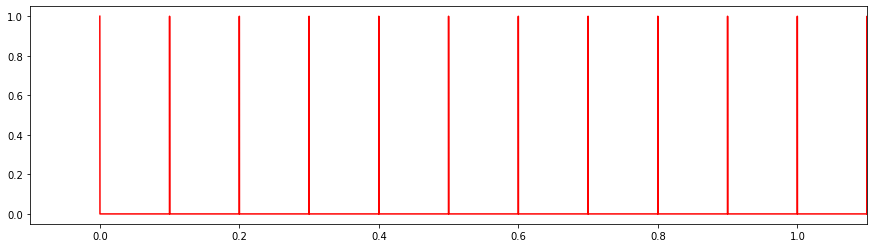

In [0]:
Tstart=0
Tstop=10
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)   # set the time
L=len(t)    
f=10     # frequency of the impulse train
lenT= int(1/(f*Tstep))    # length of of period

impls=np.zeros(L)   # impulse signal, impulse=0 for all t except at t=T it equals to 1
for i in  range (0, L,lenT):
    impls[i]=1
plt.figure(figsize=(15,4))
plt.plot(t, impls,'r')
plt.xlim(-.1,1.1)

Let us plot the impulse signal in the frequency domain. Note that there is an impulse at integer multiples of $f=\frac{1}{T} = 10$

(-50.0, 50.0)

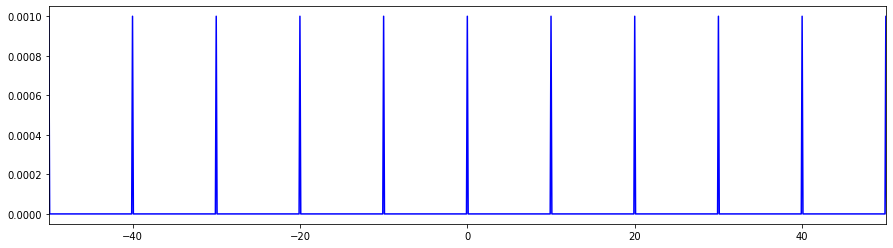

In [0]:
N=len(t)           
IMPLS = np.abs(np.fft.fft(impls))  # fft of the impulse signal
freqs = np.fft.fftfreq(impls.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
IMPLS=IMPLS[idx]/N
plt.figure(figsize=(15,4))
plt.plot(freqs, IMPLS,'b')
plt.xlim(-50,50)

# Ideal Sampling in the Time and Frequency Domains

Let us now sample the signal $m(t) = \cos( 2 \pi f_mt)$ using the **ideal sampling method**.  The sampled signal is generated by multiplying the message signal by an impulse train with period $Ts$. The sampling frequency here is $f_s=20Hz$.

(0.0, 1.0)

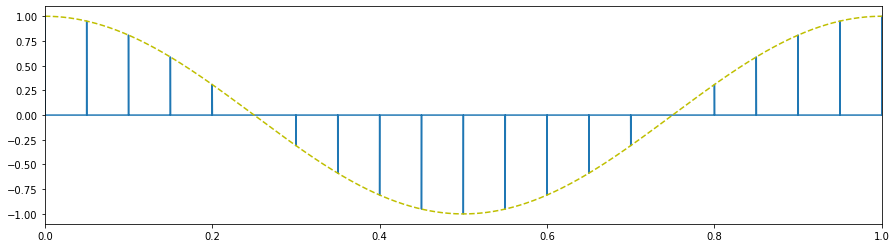

In [0]:
Tstart=0
Tstop=10
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence

fs=20    # frequency of the periodic pulse train 
lenTs= int(1/(fs*Tstep))   # period length

fm=1    # frequency of message signal
Am=1    # amplitude of message signal
mt=Am*np.cos(2 * np.pi * fm* t) # message signal

impls=np.zeros(L)
for i in  range (0, L,lenTs):
    impls[i]=1
    
mtIdeal= impls*mt # sampled signal
plt.figure(figsize=(15,4))
plt.plot(t, mtIdeal, t,mt,'y--')
plt.xlim(0,1)


**Excercise:** Change the sampling frequency $f_s$ to $5, 10$ and $30$ and observe the changes on the sampled signal.

Let us now show how the sampled signal differes from the message signal.

First let us look at the message signal in frequency domain

(-10.0, 10.0)

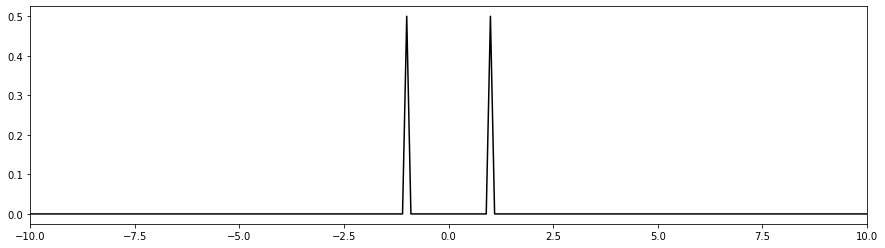

In [0]:
N=len(t)         
MF = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
MF=MF[idx]/N
plt.figure(figsize=(15,4))
plt.plot(freqs, MF,'k')
plt.xlim(-10,10)

Now let us look at the impulse signal in frequency domain

(-50.0, 50.0)

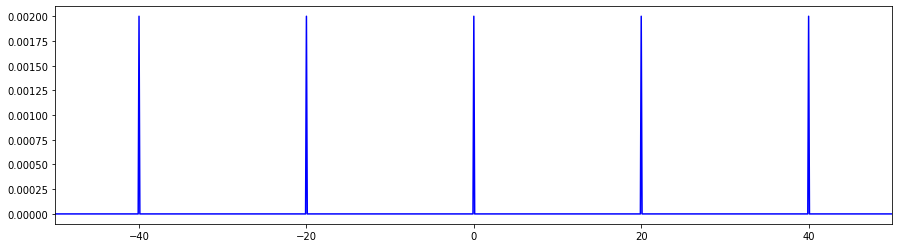

In [0]:
N=len(t)   
IMP= np.abs(np.fft.fft(impls))
freqs = np.fft.fftfreq(impls.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
IMP=IMP[idx]/N
plt.figure(figsize=(15,4))
plt.plot(freqs, IMP,'b')
plt.xlim(-50,50)

And finally let us plot the sampled signal in the frequency domain

(-200.0, 200.0)

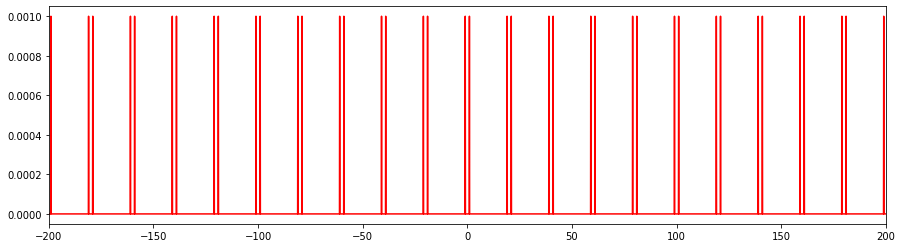

In [0]:
N=len(t)   
SF = np.abs(np.fft.fft(mtIdeal))
freqs = np.fft.fftfreq(mtIdeal.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
plt.figure(figsize=(15,4))
plt.plot(freqs, SF,'r')
plt.xlim(-200,200)

**Signal reconstruction**: Now we will use the interpolation method to reconstruct the message signal from the samples. 

$\hat{x}(t) = \sum_{n=-\infty}^\infty x[nTs]sinc(\frac{t-nTs}{Ts})$

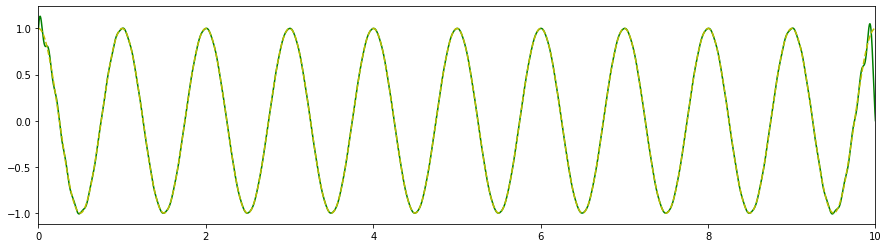

In [0]:
nsamples=int(L/lenTs)  # number of impulses in the specified time t
e=np.zeros(L)
for x in range (0,nsamples):
    e=e+mtIdeal[x*lenTs]*np.sinc((t*fs-x))

plt.figure(figsize=(15,4))  # plot the reconstructed signal and the message signal
plt.plot(t,e,'g',t,mt,'y--')
plt.xlim(0,10)
plt.show()

# Natural Sampling in the Time and Frequency Domains

Let us now sample the signal $m(t) = \cos( 2 \pi f_mt)$ using the **natural sampling method**. The sampled signal is generated my multiplying the message signal by a periodic pulse train. The sampling frequency is $f_s=20Hz$

(0.0, 1.0)

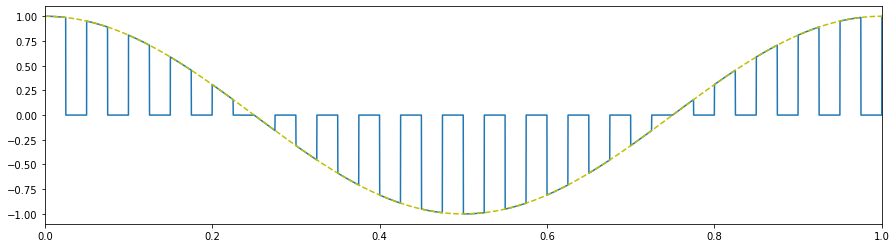

In [0]:
Tstart=0
Tstop=10
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)
fs=20    # frequency of the periodic pulse train
dty=0.5 # duty cycle
ptrain=0.5*(1+signal.square(2 * np.pi * fs * t, duty=dty))
fm=1
Am=1
mt=Am*np.cos(2 * np.pi * fm* t) # message signal
st=mt*ptrain                    # sampled signal
mtNatural= mt*ptrain    # sampled signal

plt.figure(figsize=(15,4))
plt.plot(t,mtNatural,t,mt,'y--')          
plt.xlim(0,1)

**Excercise:** Change the frequency and the duty cycle of the pulse train (square wave) to see their effect on the sampled signal. Try $f_s=30, 10$ and $5$, then with $f_s=10$ change the duty cycle to 0.2, and 0.7.

First let us look at the message signal in frequency domain

(-10.0, 10.0)

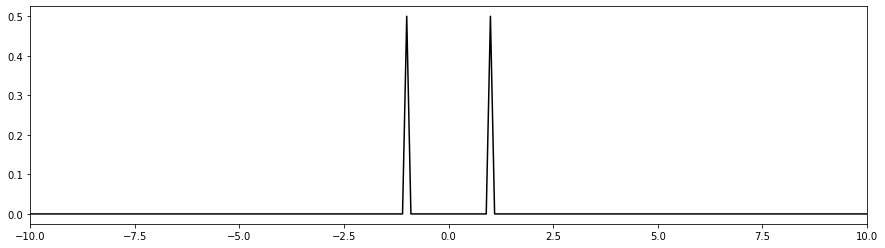

In [0]:
N=len(t)         
MF = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
MF=MF[idx]/N
plt.figure(figsize=(15,4))
plt.plot(freqs, MF,'k')
plt.xlim(-10,10)

Now let us look at the sampled signal in frequency domain

(-200.0, 200.0)

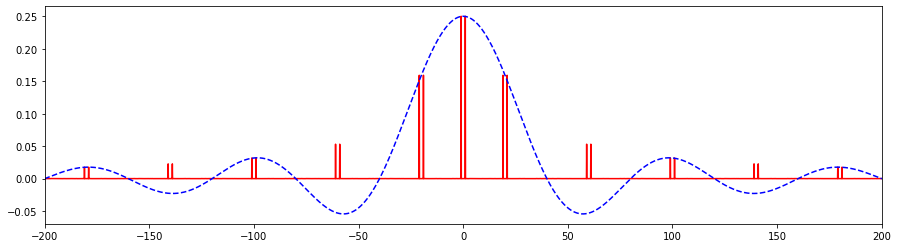

In [0]:
N=len(t)   
MFNatural= np.abs(np.fft.fft(mtNatural))
freqs = np.fft.fftfreq(mtNatural.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]

MFNatural=MFNatural[idx]/N    # Sampled signal in the frequency domain

sincEnvelope=0.5*dty*np.sinc(freqs*dty/fs) # the envelope of the sampled signal follows a sinc function
                          # tau here is equal to dty/fs

plt.figure(figsize=(15,4))
plt.plot(freqs, MFNatural,'r', freqs,sincEnvelope,'b--')
plt.xlim(-200,200)

**Excercise:** Compare the last figure with the spectrum of the ideally-sampled signal (in section 2) What do you observe?

# Flat-Topped Sampling in the Time and Frequency Domains

Let us now sample the signal $m(t) = \cos( 2 \pi f_mt)$ using the **flat-topped sampling method**.  The sampled signal is generated using the sample and hold method, which means that the message signal is sampled at time $Ts$, and the value of the signal is held for a fraction of the sampling period that can be controlled using the duty cycle. The sampling frequency here is $f_s=20Hz$.

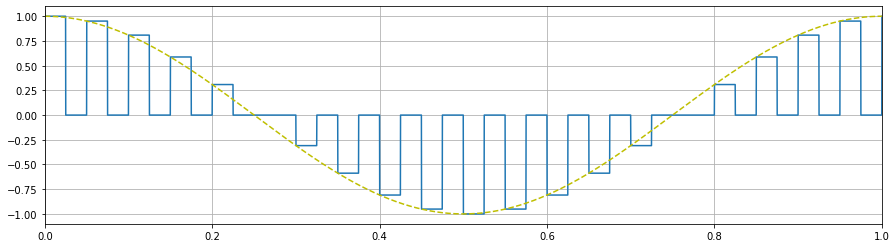

In [0]:
Tstart=0
Tstop=10
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence

fs=20    # frequency of the periodic pulse train 
dty=0.5 # duty cycle of periodic pulse train
lenTs= int(1/(fs*Tstep))   # length of period

fm=1    # frequency of message signal
Am=1    # amplitude of message signal
mt=Am*np.cos(2 * np.pi * fm* t) # message signal

mtFlat=np.zeros(L)
for i in  range (0, L,lenTs):
    mtFlat[i:i+int(lenTs*dty)-1]=mt[i]   # sampled signal

plt.figure(figsize=(15,4))
plt.xlim(0,1)
plt.plot(t, mtFlat,t,mt,'y--')
plt.grid()

**Excercise:** Change the sampling frequency and the duty cycle to see their effect on the sampled signal. Try $f_s=30, 10$ and $5$, then with $f_s=10$ change the duty cycle to 0.2, and 0.7.

First let us look at the message signal in frequency domain

(-10.0, 10.0)

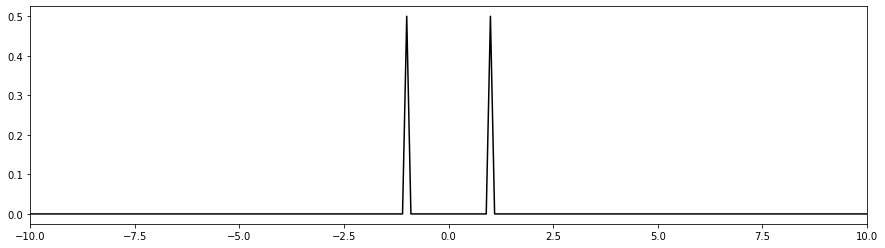

In [0]:
N=len(t)         
MT = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
MT=MT[idx]/N
plt.figure(figsize=(15,4))
plt.plot(freqs, MT,'k')
plt.xlim(-10,10)

Now let us look at the sampled signal in frequency domain

(-200.0, 200.0)

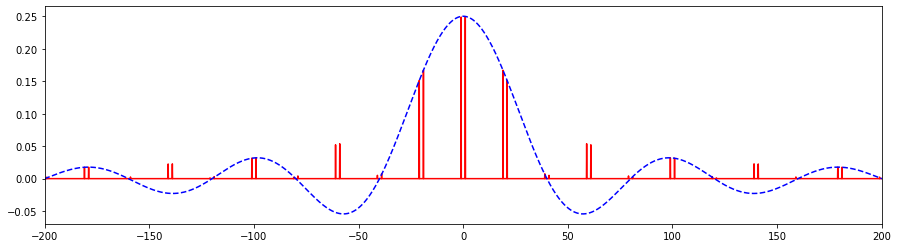

In [0]:
N=len(t)   
MFFlat= np.abs(np.fft.fft(mtFlat))
freqs = np.fft.fftfreq(mtFlat.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
MFFlat=MFFlat[idx]/N
sincEnvelopeFlat=0.5*dty*np.sinc(freqs*dty/fs) # the envelope of the sampled signal follows a sinc function
                          # tau here is equal to dty/fs

plt.figure(figsize=(15,4))
plt.plot(freqs, MFFlat,'r',freqs,sincEnvelopeFlat,'b--')
plt.xlim(-200,200)

**Excercise:** Compare the last figure with the spectrum of the ideally-sampled signal (in section 2) What do you observe?

# The sampling Theorem

In this section we will sample three cosine signals with different bandwidths ($f_m$) to see the relation between the signal frequency $f_m$ and the sampling frequency $f_s$. 
We will start with $f_s> 2W$, then $f_s=2W$, and finally $f_s<2W$ 

**Case 1:** $f_S>2W$

Let us plot the message signal $m(t) = 1* \cos(2\pi (10) t)$.

$f_m$ = 10 while $f_s=100$ which means that $f_s >2f_m$  

(0.0, 1.0)

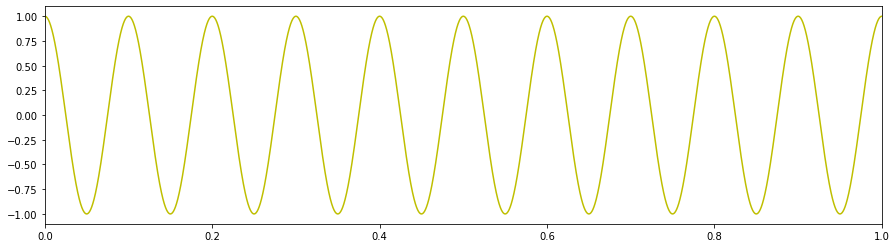

In [0]:
Tstart=0
Tstop=10
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the time sequence

fs=100    # frequency of the periodic pulse train 
lenTs= int(1/(fs*Tstep))   # length of period

fm1=10    # frequency of message signal
Am1=1    # amplitude of message signal
mt1=Am1*np.cos(2 * np.pi * fm1* t) # message signal
plt.figure(figsize=(15,4))
plt.plot(t,mt1,'y')
plt.xlim(0,1)

Let us plot the sampled signal in the time domain

(0.0, 1.0)

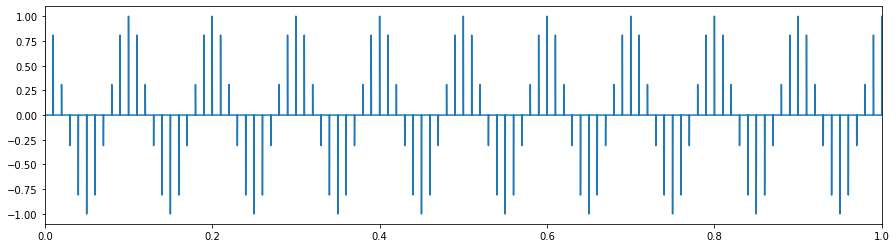

In [0]:
impls=np.zeros(L) # impulse train
for i in  range (0, L,lenTs):
    impls[i]=1

mtIdeal1= impls*mt1 # sample the message signal

plt.figure(figsize=(15,4))  # plot the sampled signal
plt.plot(t, mtIdeal1)
plt.xlim(0,1)

Now we will plot the message signal and the sampled signal in the frequency

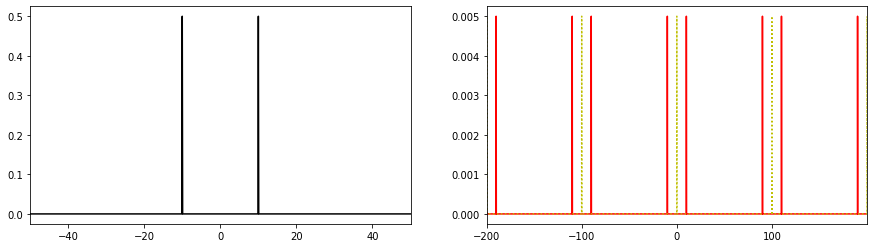

In [0]:
f = plt.figure(figsize=(15,4))  # plot the message signal and the sampled signal in the frequency domain
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

N=len(t)         
MF1 = np.abs(np.fft.fft(mt1))   # message signal in frequency domain with bandwidth fm=W=10. or 2W=20
freqs = np.fft.fftfreq(mt1.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
MF1=MF1[idx]/N
ax1.plot(freqs, MF1,'k')
ax1.set_xlim(-50,50)

N=len(t)
SF1 = np.abs(np.fft.fft(mtIdeal1))
freqs = np.fft.fftfreq(mtIdeal1.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF1=SF1[idx]/N
ax2.plot(freqs, SF1,'r')
ax2.set_xlim(-200,200)
a=list(range(-200,200,fs))  # to add markers on the figure at integer multiples of f
ax2.set_xticks(a) 

IMP = np.abs(np.fft.fft(impls))   # to draw lines at n*fs
freqs = np.fft.fftfreq(impls.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
IMP=IMP[idx]/N
ax2.plot(freqs, 0.5*IMP,'y:')

**Signal Reconstruction**

Now we will use the interpolation method to reconstruct the sampled signal. 

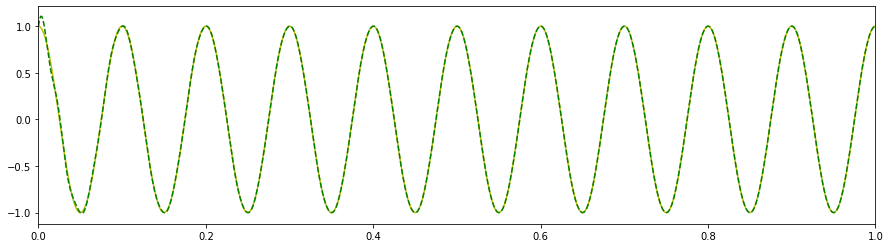

In [0]:
nsamples=int(L/lenTs)  # 
e=np.zeros(L)
for x in range (0,nsamples):
    e=e+mtIdeal1[x*lenTs]*np.sinc((t*fs-x))

plt.figure(figsize=(15,4))  # plot the reconstructed signal and the message signal
plt.plot(t,mt1,'y',t,e,'g--')
plt.xlim(0,1)
plt.show()

**Case 2:** $f_s=2W$

Let us plot the message signal $m(t) = 1* \cos(2\pi (50) t)$.

$f_m$ = 50 while $f_s=100$ which means that $f_s =2f_m$  

(0.0, 1.0)

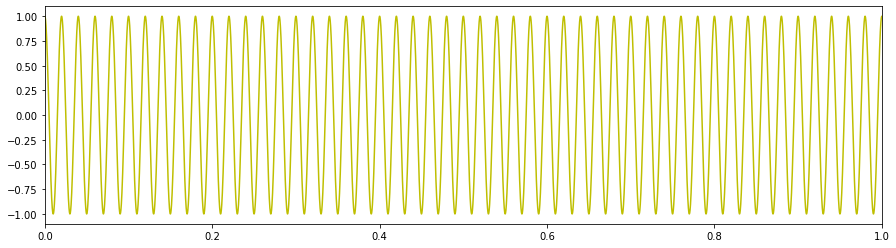

In [0]:
Tstart=0
Tstop=10
Tstep=1e-4 
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the time sequence

fs=100    # frequency of the periodic pulse train 
lenTs= int(1/(fs*Tstep))   # period length

fm2=50    # frequency of message signal
Am2=1    # amplitude of message signal
mt2=Am2*np.cos(2 * np.pi * fm2* t) # message signal
plt.figure(figsize=(15,4))
plt.plot(t,mt2,'y')
plt.xlim(0,1)

Let us plot the sampled signal in the time domain

(0.0, 1.0)

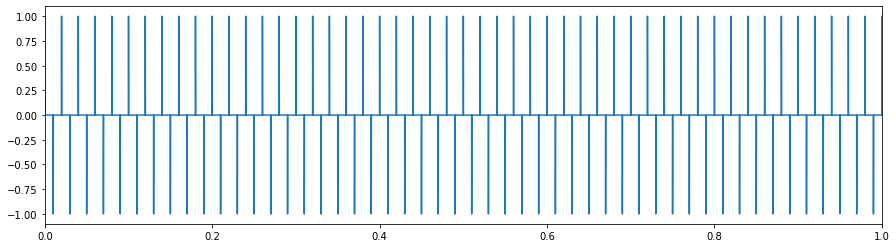

In [0]:
impls=np.zeros(L) # impulse train
for i in  range (0, L,lenTs):
    impls[i]=1

mtIdeal2= impls*mt2 # sample the message signal

plt.figure(figsize=(15,4))
plt.plot(t,mtIdeal2)
plt.xlim(0,1)

Now we will plot the message signal and the sampled signal in the frequency

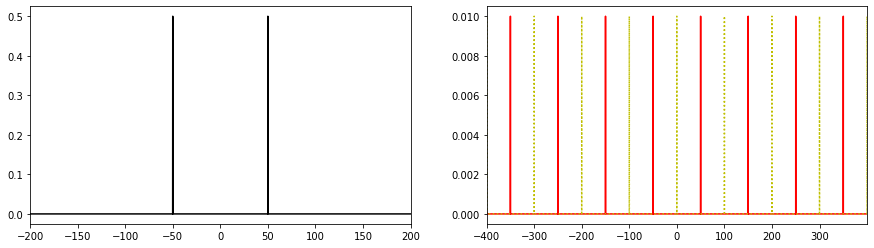

In [0]:
f = plt.figure(figsize=(15,4))  # plot the message signal and the sampled signal in the frequency domain
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

N=len(t)         
MF2 = np.abs(np.fft.fft(mt2))   # message signal in frequency domain with bandwidth W=5. or 2W=10
freqs = np.fft.fftfreq(mt2.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
MF2=MF2[idx]/N
ax1.plot(freqs, MF2,'k')
ax1.set_xlim(-200,200)

N=len(t)
SF2 = np.abs(np.fft.fft(mtIdeal2))
freqs = np.fft.fftfreq(mtIdeal2.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF2=SF2[idx]/N
ax2.plot(freqs, SF2,'r')
ax2.set_xlim(-400,400)
a=list(range(-400,400,fs))  # to add markers on the figure at integer multiples of f
ax2.set_xticks(a) 

IMP = np.abs(np.fft.fft(impls))   # to draw lines at n*fs
freqs = np.fft.fftfreq(impls.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
IMP=IMP[idx]/N
ax2.plot(freqs, IMP,'y:')

**Signal Reconstruction**

Now we will use the interpolation method to reconstruct the sampled signal. 

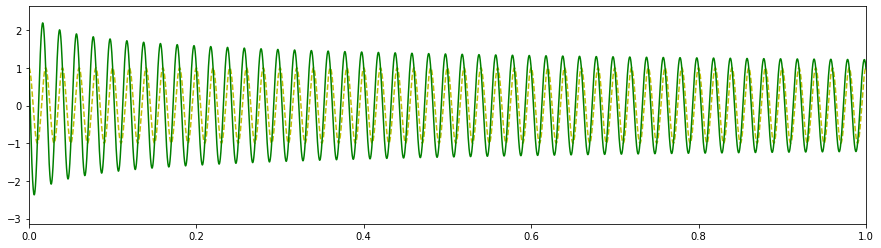

In [0]:
nsamples=int(L/lenTs) 
e=np.zeros(L)
for x in range (0,nsamples):  
    e=e+mtIdeal2[x*lenTs]*np.sinc((t*fs-x))

plt.figure(figsize=(15,4))  # plot the reconstructed signal and the message signal
plt.plot(t,mt2,'y--',t,e,'g')
plt.xlim(0,1)
plt.show()

**Case 2:** $f_s<2W$

Let us plot the message signal $m(t) = 1* \cos(2\pi (80) t)$.

$f_m$ = 80 while $f_s=100$ which means that $f_s <2f_m$  

(0.0, 1.0)

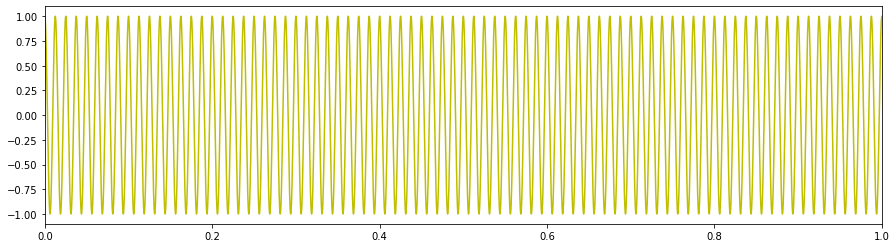

In [0]:
Tstart=0
Tstop=10
Tstep=1e-4 
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the time sequence

fs=100    # frequency of the periodic pulse train 
lenTs= int(1/(fs*Tstep))   # period length

fm3=80    # frequency of message signal
Am3=1    # amplitude of message signal
mt3=Am3*np.cos(2 * np.pi * fm3* t) # message signal

plt.figure(figsize=(15,4))
plt.plot(t,mt3,'y')
plt.xlim(0,1)

Let us plot the sampled signal in the time domain

(0.0, 1.0)

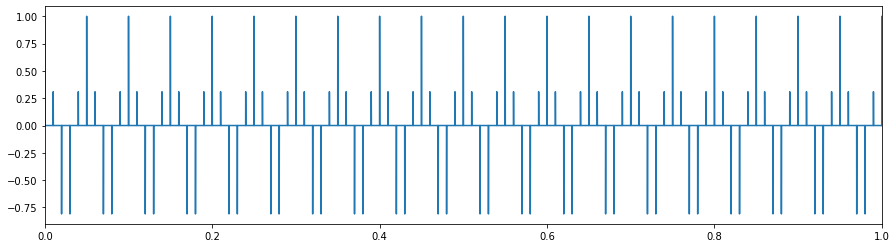

In [0]:
impls=np.zeros(L) # impulse train
for i in  range (0, L,lenTs):
    impls[i]=1

mtIdeal3= impls*mt3 # sample the message signal

plt.figure(figsize=(15,4))
plt.plot(t,mtIdeal3)
plt.xlim(0,1)

Now we will plot the message signal and the sampled signal in the frequency

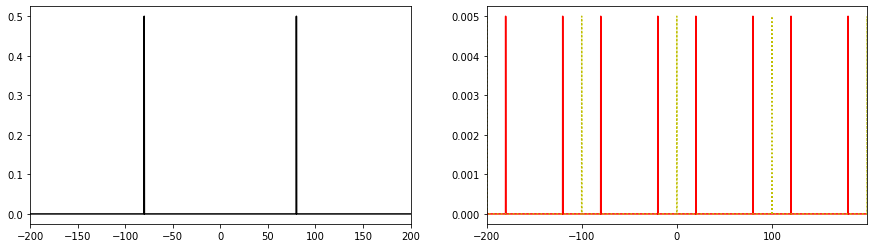

In [0]:
f = plt.figure(figsize=(15,4))  # plot the message signal and the sampled signal in the frequency domain
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

N=len(t)         
MF3 = np.abs(np.fft.fft(mt3))   # message signal in frequency domain with bandwidth W=5. or 2W=10
freqs = np.fft.fftfreq(mt3.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
MF3=MF3[idx]/N
ax1.plot(freqs, MF3,'k')
ax1.set_xlim(-200,200)

N=len(t)
SF3 = np.abs(np.fft.fft(mtIdeal3))
freqs = np.fft.fftfreq(mtIdeal3.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF3=SF3[idx]/N
ax2.plot(freqs, SF3,'r')
ax2.set_xlim(-200,200)
a=list(range(-200,200,fs))  # to add markers on the figure at integer multiples of f
ax2.set_xticks(a) 

IMP = np.abs(np.fft.fft(impls))   # to draw lines at n*fs
freqs = np.fft.fftfreq(impls.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
IMP=IMP[idx]/N
ax2.plot(freqs, 0.5*IMP,'y:')

**Signal Reconstruction**

Now we will use the interpolation method to reconstruct the sampled signal. 

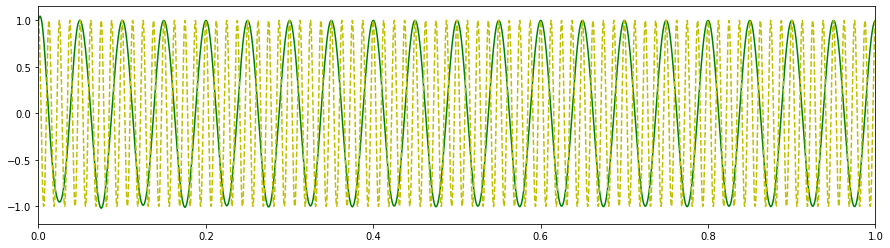

In [0]:
nsamples=int(L/lenTs) 
e=np.zeros(L)
for x in range (0,nsamples):  
    e=e+mtIdeal3[x*lenTs]*np.sinc((t*fs-x))

plt.figure(figsize=(15,4))  # plot the reconstructed signal and the message signal
plt.plot(t,e,'g',t,mt3,'y--')
plt.xlim(0,1)
plt.show()

**Excercise** Compare the last three results. What do you conclude?

# Time Division Multiplexing

In this section we will time-multiplex two signals. The first signal $m_1(t) = 1*\cos(2\pi (1)t)$, the second signal $m_2(t)=1$.
Let us plot the signals

(0.0, 1.0)

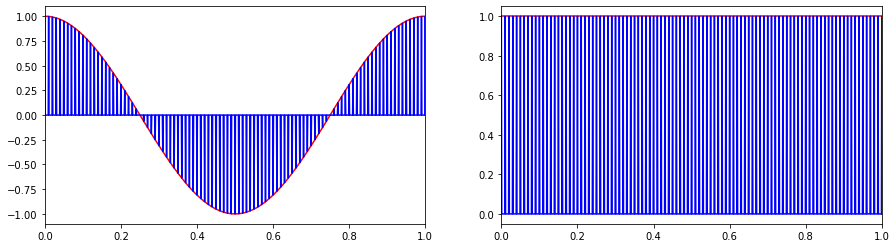

In [0]:
Tstart=0
Tstop=10
Tstep=1e-3
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence
N=2 # data rate of TDM line to the data rate of individual lines (number of multiplexed signals)

fs=100    # frequency of the periodic impulse train
lenTs= int(1/(fs*Tstep))   # period lengthS
impls=np.zeros(L)     # impulse train
for i in  range (0, L,lenTs):
    impls[i]=1

fm=1    # frequency of the first message signal
Am=1    # amplitude of the first message signal
mt1=Am*np.cos(2 * np.pi * fm* t) # the first message signal is sinusoidal

mt2=np.ones(L)    # second message signal is all ones

mtIdeal1= impls*mt1   # sampling the first signal
mtIdeal2=impls*mt2    # sampling the second signal

f = plt.figure(figsize=(15,4))  # plot the message signal and the sampled signal in the frequency domain
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.plot(t, mt1,'r',t,mtIdeal1,'b')
ax1.set_xlim(0,1)

ax2.plot(t, mt2,'r',t,mtIdeal2,'b')
ax2.set_xlim(0,1)

Let us multiplex the two signals

(0.0, 1.0)

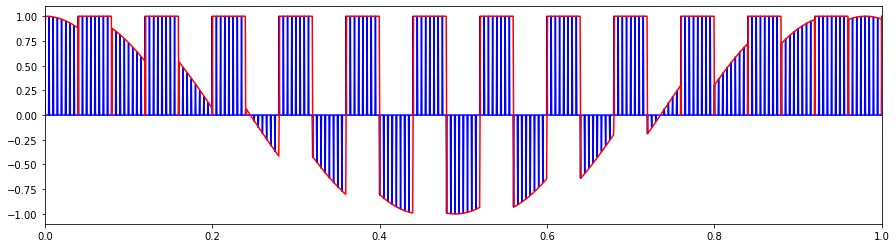

In [0]:
# TDM
Nsamp=int(8*lenTs)    #number of samples taken from each signal mtideal1, mtideal2

tline=np.arange(Tstart,Tstop,Tstep/N) # rate at the output of the TDM is N*rate of the multiplexed lines
TDMline= np.zeros(len(tline))
indx=0
for samp in range (0,L,N*Nsamp):    #multiplexing the two signals
    TDMline[samp:samp+Nsamp-1]=mtIdeal1[indx:indx+Nsamp-1]
    TDMline[samp+Nsamp:samp+2*Nsamp-1]=mtIdeal2[indx:indx+Nsamp-1]
    indx=indx+Nsamp

# the following code plots the TDM of the message signals (unsampled) to clarify the envelope of the signals
indx=0     
envTDMline= np.zeros(len(tline))
for samp in range (1,L,N*Nsamp):    #multiplexing
    envTDMline[samp:samp+Nsamp-1]=mt1[indx:indx+Nsamp-1]
    envTDMline[samp+Nsamp:samp+2*Nsamp-1]=mt2[indx:indx+Nsamp-1]
    indx=indx+Nsamp

plt.figure(figsize=(15,4))
plt.plot(tline, TDMline,'b',tline, envTDMline,'r')
plt.xlim(0,1)

**Crosstalk**

Let $f_c$ be the bandwidth of a baseband channel. To avoid crosstalk, the spacing between two consecutive samples must be less than or equal to $\frac{1}{2 f_c}$. If this condition is not satisfied, crosstalk will occur and part of the information transmitted by each user may spill over into the time slot allocated to second user.

Let us first plot the TDM signal that results from multiplexing the following two signals: $m_1(t) = \cos(2\pi (1)t)$, and $m_2(t) = \cos(2\pi (2)t)$ 

(0.0, 1.0)

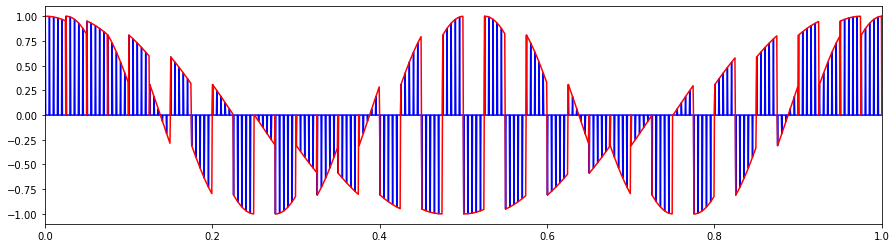

In [0]:
Tstart=0
Tstop=10
Tstep=1e-3
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence
N=2 # data rate of TDM line to the data rate of individual lines (number of multiplexed signals)

fs=100    # frequency of the periodic impulse train
lenTs= int(1/(fs*Tstep))   # period lengthS
impls=np.zeros(L)     # impulse train
for i in  range (0, L,lenTs):
    impls[i]=1

fm1=1    # frequency of the first message signal
Am=1    # amplitude of the first message signal
mt1=Am*np.cos(2 * np.pi * fm1* t) # the first message signal is sinusoidal

fm2=2    # frequency of the first message signal
Am=1    # amplitude of the first message signal
mt2=Am*np.cos(2 * np.pi * fm2* t) # the first message signal is sinusoidal

mtIdeal1= impls*mt1   # sampling the first signal
mtIdeal2=impls*mt2    # sampling the second signal

# TDM
k=5   # number of samples taken from each user
Nsamp=int(k*lenTs)    #length of the sequence taken from each user

tline=np.arange(Tstart,Tstop,Tstep/N) # rate at the output of the TDM is N*rate of the multiplexed lines
TDMline= np.zeros(len(tline))
indx=0
for samp in range (1,L,N*Nsamp):    #multiplexing the two signals
    TDMline[samp:samp+Nsamp-1]=mtIdeal1[indx:indx+Nsamp-1]
    TDMline[samp+Nsamp:samp+2*Nsamp-1]=mtIdeal2[indx:indx+Nsamp-1]
    indx=indx+Nsamp

# the following code plots the TDM of the message signals (unsampled) only to clarify the envelope of the signals
indx=0     
envTDMline= np.zeros(len(tline))
for samp in range (1,L,N*Nsamp):    #multiplexing
    envTDMline[samp:samp+Nsamp-1]=mt1[indx:indx+Nsamp-1]
    envTDMline[samp+Nsamp:samp+2*Nsamp-1]=mt2[indx:indx+Nsamp-1]
    indx=indx+Nsamp
f = plt.figure(figsize=(15,4))
plt.plot(tline, TDMline,'b',tline, envTDMline,'r')
plt.xlim(0,1)


**Case 1:** No crosstalk

When the spacing between the samples meets the condition i.e., spacing $\le \frac{1}{2f_c}$

(0.0, 1.0)

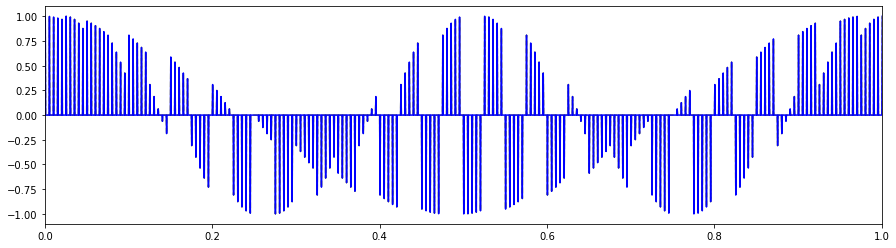

In [0]:
nsamples=int(len(tline)/(lenTs/(N*k)))

ncross=np.zeros(len(tline))
for x in range (0,int(nsamples)):
    ncross=ncross+TDMline[x* int(lenTs/(N*k))]*np.sinc(2*(N*k)*(fs)*tline-x)

plt.figure(figsize=(15,4))  # plot the reconstructed signal and the message signal
plt.plot(tline,TDMline,'y--',tline,ncross,'b')
plt.xlim(0,1)

** Case 2:** Crosstalk:
When the spacing condition is not satisfied, the signal at the output of the channel will differ from the transmitted signal, and synchronization is lost

(0.0, 1.0)

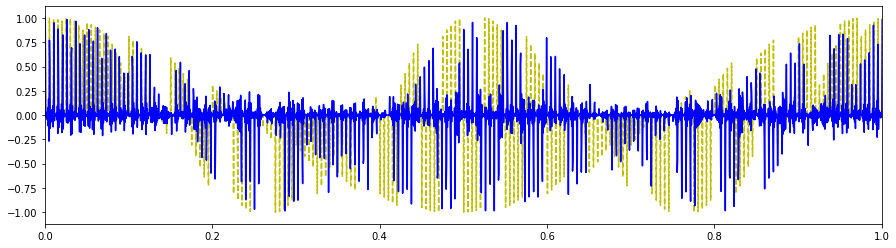

In [0]:
nsamples=int(len(tline)/(lenTs/(N*k)))

cross=np.zeros(len(tline))
for x in range (0,int(nsamples)):
    cross=cross+TDMline[x* int(lenTs/(N*k))]*np.sinc(2*(N*k)*(fs-4)*tline-x)

plt.figure(figsize=(15,4))  # plot the reconstructed signal and the message signal
plt.plot(tline,TDMline,'y--',tline,cross,'b')
plt.xlim(0,1)